In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy import signal

%matplotlib inline

In [14]:
def psi_(x_space,y_space,x_0,y_0,theta,sigma):
    angle = np.array([np.cos(theta),np.sin(theta)])
    xy = lambda x,y: np.array([x,y])
    gaussian = lambda xy: np.exp(-(np.dot(xy,xy))/(2*sigma**2))
    phase = lambda xy: np.exp((1j*np.pi*np.dot(angle,xy))/(2*sigma))
    phase_conj = lambda xy: np.exp(-(1j*np.pi*np.dot(angle,xy))/(2*sigma))
    
    #c2 normalization formula
    numerator = 0
    denominator = 0
    
    for i in xrange(x_space):
        for j in xrange(y_space):
            denominator += gaussian(xy(i-x_0,j-y_0))
            numerator += gaussian(xy(i-x_0,j-y_0))*phase(xy(i-x_0,j-y_0))
    c2 = numerator/denominator
    
    #c1 normalization formula
    norm = 0
    psi = lambda xy: (phase(xy) - c2)*gaussian(xy)
    psi_conj = lambda xy: (phase_conj(xy) - c2)*gaussian(xy)
    
    for i in xrange(x_space):
        for j in xrange(y_space):
            norm += psi_conj(xy(i-x_0,j-y_0))*psi(xy(i-x_0,j-y_0))
    c1 = 1./np.sqrt(norm)
    
    space = np.zeros((x_space,y_space),dtype=complex)
    
    for i in xrange(x_space):
        for j in xrange(y_space):
            space[i][j] = c1 * psi(xy(i-x_0,j-x_0))
    
    
    return space
    

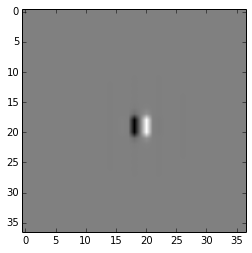

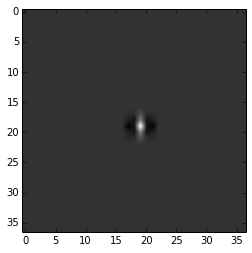

In [15]:
out = psi_(37,37,19,19,np.pi/2.,1)


plt.imshow(out.imag,cmap="gray")
plt.show()
plt.imshow(out.real,cmap="gray")
plt.show()

In [16]:
def mapping(matrix):
    max_val = 0
    min_val = 0
    for i in matrix:
        if max(i) > max_val:
            max_val = max(i)
        if min(i) < min_val:
            min_val = min(i)
    map_ = interp1d([min_val,max_val],[0,256])
    return map_(matrix)

In [17]:
#visual = mapping(out)
#cv2.imshow("image",visual.imag)
#cv2.imwrite("image.jpg",visual.imag)

In [21]:
image = cv2.imread("circle.jpg",0)
convolved = signal.convolve2d(image,out)

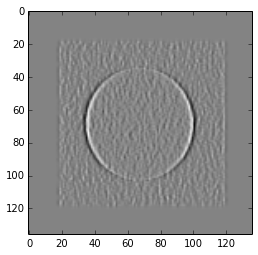

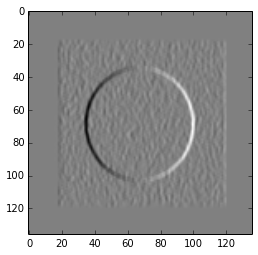

In [22]:
plt.imshow(convolved.real,cmap="gray")
plt.show()
plt.imshow(convolved.imag,cmap="gray")
plt.show()

In [59]:
#calculate maxima for the different angles
max_array = np.zeros((len(image)+36,len(image[0])+36)) #padding
print len(image)
print len(image[0])
for i in [1,3,6]:
    for j in [0, np.pi/4., np.pi/2., 3*np.pi/4.]:
        wavelet = psi_(37,37,19,19,j,i)
        convolved = signal.convolve2d(image,wavelet)            
        max_array = np.maximum(convolved,max_array)


100
100


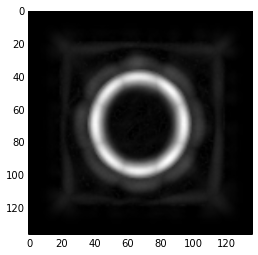

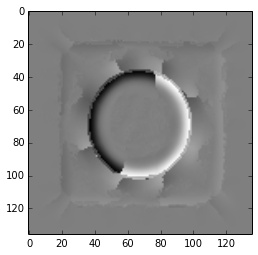

In [60]:
plt.imshow(max_array.real,cmap="gray")
plt.show()
plt.imshow(max_array.imag,cmap="gray")
plt.show()